## FACS Sorting and regrowth

In [1]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
loc='/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN003/ePN003_BOA/Data/'

In [3]:
files=sorted(os.listdir(loc))
t0=files[0:4]
t24=files[4:8]
t48=files[8:12]

In [15]:
def fsc_reader(f):
    fsc_vals=np.array(FCMeasurement(ID="",datafile=f)['FSC-A'])
    return fsc_vals

In [16]:
os.path.join(loc,t0[0])

'/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN003/ePN003_BOA/Data/CTS1_0Tube_001.fcs'

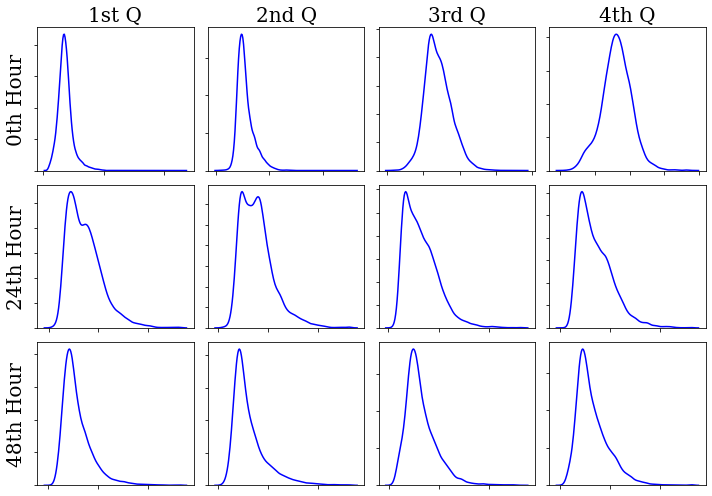

In [17]:
plt.rc('font',family='serif')

fig,ax=plt.subplots(nrows=3,ncols=4,figsize=(10,7))

for i in range(4):
    
    
    
    sns.distplot(fsc_reader(os.path.join(loc,t0[i])),ax=ax[0,i],hist=None,color='blue')
    sns.distplot(fsc_reader(os.path.join(loc,t24[i])),ax=ax[1,i],hist=None,color='blue')
    sns.distplot(fsc_reader(os.path.join(loc,t48[i])),ax=ax[2,i],hist=None,color='blue')

#     ax[0,i].set_xlim(0,300000)
#     ax[1,i].set_xlim(0,300000)
#     ax[2,i].set_xlim(0,300000)
    
    ax[0,i].set_xticklabels([])
    ax[1,i].set_xticklabels([])
    ax[2,i].set_xticklabels([])
    
    ax[0,i].set_yticklabels([])
    ax[1,i].set_yticklabels([])
    ax[2,i].set_yticklabels([])
    
    ax[0,i].set_ylabel('')
    ax[1,i].set_ylabel('')
    ax[2,i].set_ylabel('')
    
ax[0,0].set_ylabel('0th Hour',fontsize=20)
ax[1,0].set_ylabel('24th Hour',fontsize=20)
ax[2,0].set_ylabel('48th Hour',fontsize=20)

ax[0,0].set_title('1st Q',fontsize=20)
ax[0,1].set_title('2nd Q',fontsize=20)
ax[0,2].set_title('3rd Q',fontsize=20)
ax[0,3].set_title('4th Q',fontsize=20)


fig.tight_layout()
# save_file='/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/ePN003_Mixing_Final.jpg'


# fig.savefig(save_file,dpi=1200)

In [62]:
start_dist=np.array([fsc_reader(os.path.join(loc,t0[0])),fsc_reader(os.path.join(loc,t0[1])),fsc_reader(os.path.join(loc,t0[2])),fsc_reader(os.path.join(loc,t0[3]))]).reshape(1,40000)

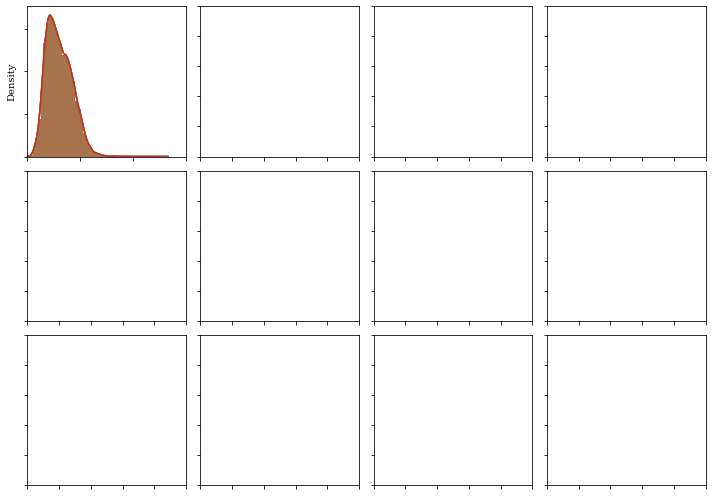

In [85]:
plt.rc('font',family='serif')

fig,ax=plt.subplots(nrows=3,ncols=4,figsize=(10,7))


for i in range(4):
    
       
        
    

    sns.distplot(start_dist,ax=ax[0,0])

    ax[0,0].set_xlim(0,300000)


    ax[0,i].set_xticklabels([])
    ax[1,i].set_xticklabels([])
    ax[2,i].set_xticklabels([])

    ax[0,i].set_yticklabels([])
    ax[1,i].set_yticklabels([])
    ax[2,i].set_yticklabels([])

    ax[0,i].set_ylabel('')
    ax[1,i].set_ylabel('')
    ax[2,i].set_ylabel('')

fig.tight_layout()

<Figure size 360x360 with 0 Axes>

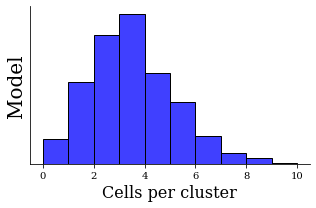

In [57]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.displot(np.random.poisson(3,1000),bins=10,height=3,aspect=1.5,color='blue')
plt.xlabel('Cells per cluster',fontsize=16)
plt.ylabel('Model',fontsize=20)
plt.yticks([])
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Distribution_Model.jpg',dpi=600)

<Figure size 360x360 with 0 Axes>

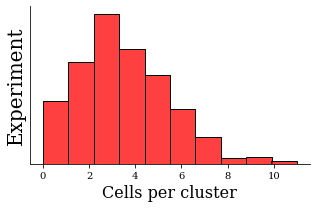

In [62]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.displot(np.random.poisson(3.5,1000),bins=10,height=3,aspect=1.5,color='red')
plt.xlabel('Cells per cluster',fontsize=16)
plt.ylabel('Experiment',fontsize=20)
plt.yticks([])
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Distribution_Exp.jpg',dpi=600)